In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [7]:
df = pd.read_excel(r'C:\Users\HP\Desktop\viral load\updated_research_data.xlsx')

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       773
           1       0.84      0.90      0.87        29
           2       0.82      0.93      0.87        29

    accuracy                           0.98       831
   macro avg       0.88      0.94      0.91       831
weighted avg       0.98      0.98      0.98       831

--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        29

    accuracy                           1.00       831
   macro avg       1.00      1.00      1.00       831
weighted avg       1.00      1.00      1.00       831

--------------------------------------------------
Model: Gradient Boosting
              precision    recall  f1-score   support

        

c:\Users\HP\viral load status\Viral-Load-Status-Classification\viral\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:45:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       0.97      1.00      0.98        29
           2       1.00      0.97      0.98        29

    accuracy                           1.00       831
   macro avg       0.99      0.99      0.99       831
weighted avg       1.00      1.00      1.00       831

--------------------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 9264, number of used features: 32
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits w

c:\Users\HP\viral load status\Viral-Load-Status-Classification\viral\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\viral load status\Viral-Load-Status-Classification\viral\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_10540\1157541288.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


Model: LightGBM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       773
           1       1.00      1.00      1.00        29
           2       1.00      0.97      0.98        29

    accuracy                           1.00       831
   macro avg       1.00      0.99      0.99       831
weighted avg       1.00      1.00      1.00       831

--------------------------------------------------


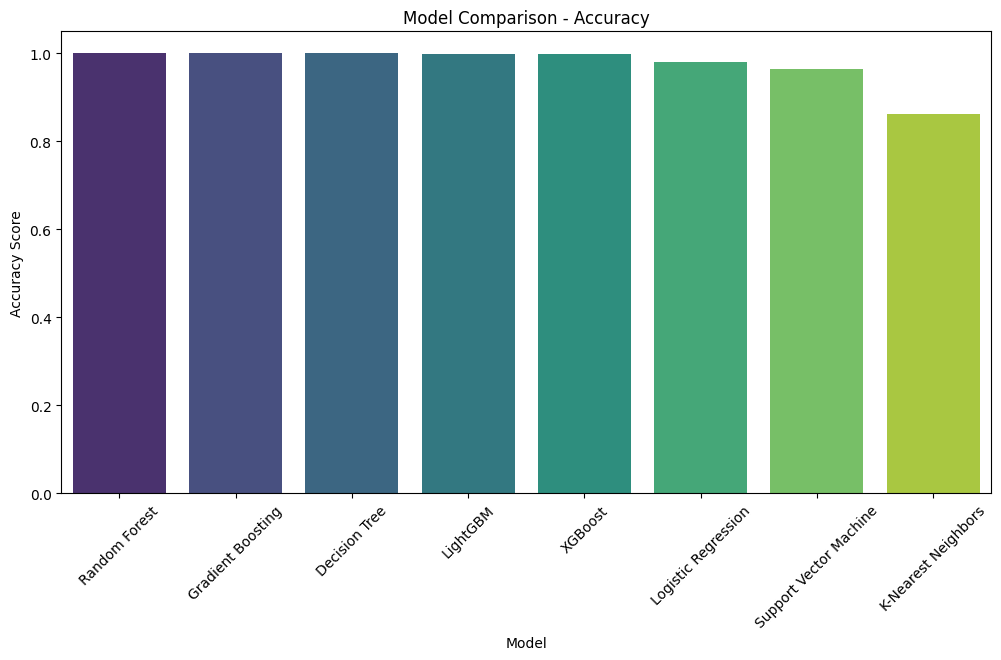

c:\Users\HP\viral load status\Viral-Load-Status-Classification\viral\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


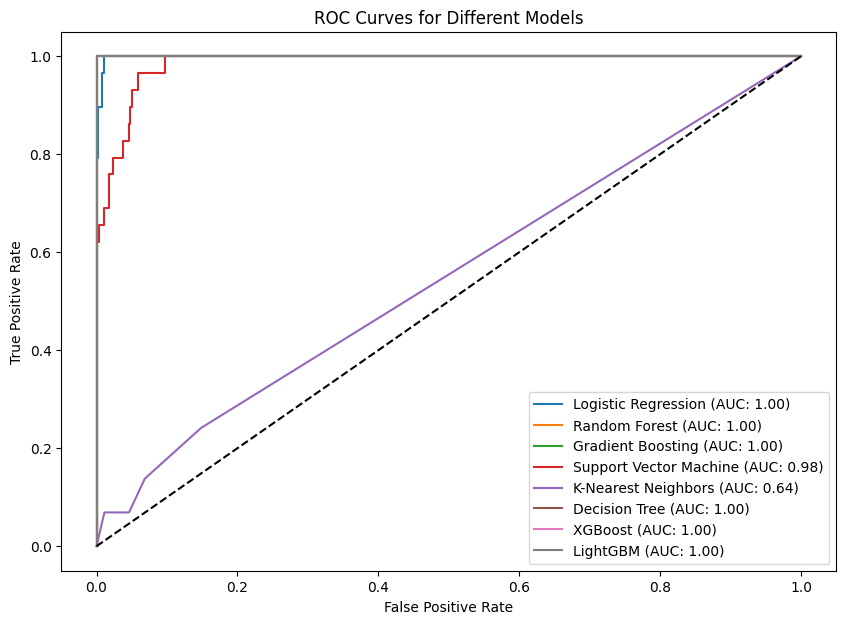

In [9]:
# Define target variable
target = "viral_load_status"
X = df.drop(columns=[target])
y = df[target]

# Encode categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "LightGBM": LGBMClassifier(),
}

# Store evaluation metrics
results = []

# Train models and evaluate
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Compute ROC-AUC if probabilities exist
    if y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        roc_auc = np.nan  # Some models (e.g., SVM) may not support probability outputs

    # Store results
    results.append({"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1, "ROC AUC": roc_auc})

    print(f"Model: {name}\n{classification_report(y_test, y_pred)}\n{'-'*50}")

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

# Plot bar chart for model performance
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy Score")
plt.show()

# Plot ROC Curve
plt.figure(figsize=(10, 7))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
        plt.plot(fpr, tpr, label=f"{name} (AUC: {roc_auc_score(y_test, y_prob, multi_class='ovr'):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.show()
